# CRQ2

### For each event, we have a pair of coordinates, that are respectively the starting and ending point of that event.

#### <font color=purple> Considering only the match Barcelona - Real Madrid played on the 6 May 2018:
#### <font color=green> Visualize with a heatmap the zones where CRISTIANO RONALDO was more active. The events to be considered are: passes, shoots, duels, free kicks. 
    
#### <font color=green> Compare his map with the one of LIONEL MESSI. Comment the results and point out the main differences (we are not looking for deep and technique analysis, just show us if there are some clear differences between the 2 plots).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import json
import requests
import seaborn as sb
from pandas.io.json import json_normalize

#Define a function that split the columns of my Data Set:

def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)

In [2]:
spaevents = pd.read_json('Events/events_Spain.json')
spamatch = pd.read_json('Matches/matches_Spain.json')

In [3]:
barmad = spamatch[spamatch['label']=='Barcelona - Real Madrid, 2 - 2']

In [4]:
clasico_events = barmad.merge(spaevents, left_on='wyId', right_on='matchId')
clasico_events = clasico_events.drop(columns=['status', 'roundId', 'teamsData', 'gameweek', 'seasonId', 'winner', 'wyId','referees', 'date', 'duration', 'competitionId'])

In [5]:
cr7 = clasico_events[clasico_events['playerId']==3322]
lionel = clasico_events[clasico_events['playerId']==3359]

In [121]:
cr7ev = cr7[(cr7['eventId'] == 1)|(cr7['eventId'] ==3) | (cr7['eventId'] == 8)|(cr7['eventId']==10)]

In [195]:
lionelev = lionel[(lionel['eventId'] == 1)|(lionel['eventId'] ==3) | (lionel['eventId'] == 8)|(lionel['eventId']==10)]

In [122]:
cr7ev = make_col(cr7ev, 'positions')

In [196]:
lionelev = make_col(lionelev, 'positions')

In [125]:
cr7ev = make_col(cr7ev, 0).rename(columns= { 'x': 'x1', 'y': 'y1'})


In [197]:
lionelev = make_col(lionelev, 0).rename(columns= { 'x': 'x1', 'y': 'y1'})

In [126]:
cr7ev = make_col(cr7ev, 1).rename(columns= { 'x': 'x2', 'y': 'y2'})

In [198]:
lionelev = make_col(lionelev, 1).rename(columns= { 'x': 'x2', 'y': 'y2'})

### Cristiano Ronaldo heatmaps

In [20]:
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Arc
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

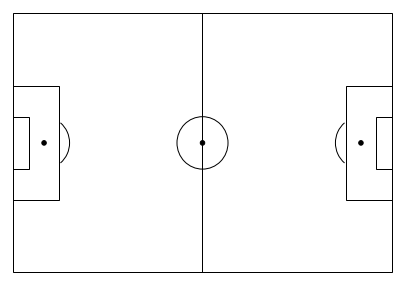

In [177]:
pitch=plt.figure() #set up the figures
pitch.set_size_inches(7, 5)
axes=pitch.add_subplot(1,1,1)
draw_pitch(axes) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

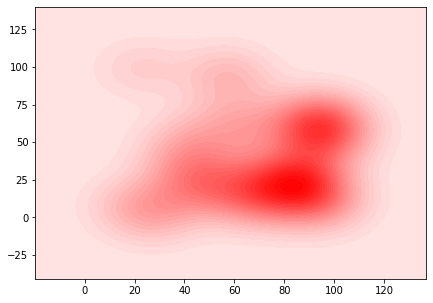

In [202]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(7, 5)

x1_coord = [i for i in cr7ev["x1"]]
y1_coord = [i for i in cr7ev["y1"]]
inizio = sb.kdeplot(x1_coord, y1_coord, shade = "True", color = "red", n_levels = 30)
plt.show()

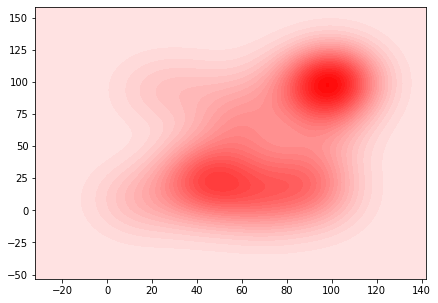

In [203]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(7, 5)

x2_coord = [i for i in cr7ev["x2"]]
y2_coord = [i for i in cr7ev["y2"]]
fine = sb.kdeplot(x2_coord, y2_coord, shade = "True", color = "red", n_levels = 30)
plt.show()

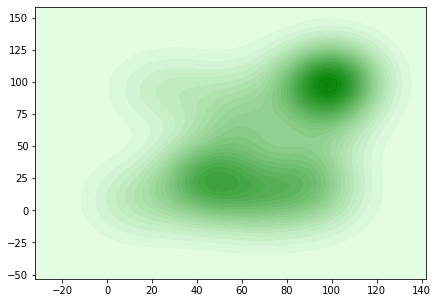

In [204]:
figtot, axtot = plt.subplots()
figtot.set_size_inches(7, 5)
xt_coord = [i for i in cr7ev["x1"]] and [k for  k in cr7ev["x2"]]
yt_coord = [i for i in cr7ev["y1"]] and [k for k in cr7ev["y2"]]
finess = sb.kdeplot(xt_coord, yt_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

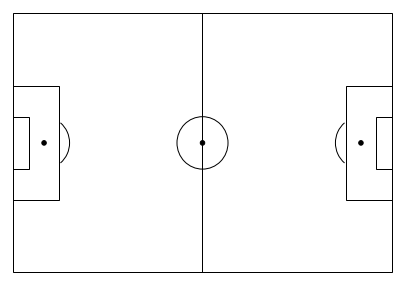

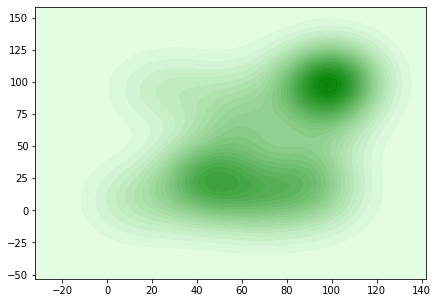

In [205]:
pitch=plt.figure() #set up the figures
pitch.set_size_inches(7, 5)
axes=pitch.add_subplot(1,1,1)
draw_pitch(axes) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
figtot, axtot = plt.subplots()
figtot.set_size_inches(7, 5)
xt_coord = [i for i in cr7ev["x1"]] and [k for  k in cr7ev["x2"]]
yt_coord = [i for i in cr7ev["y1"]] and [k for k in cr7ev["y2"]]
finess = sb.kdeplot(xt_coord, yt_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

## Lionel Messi heatmaps

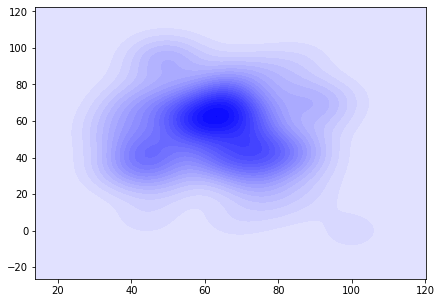

In [209]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(7, 5)

x3_coord = [i for i in lionelev["x1"]]
y3_coord = [i for i in lionelev["y1"]]
inizio2 = sb.kdeplot(x3_coord, y3_coord, shade = "True", color = "blue", n_levels = 30)
plt.show()

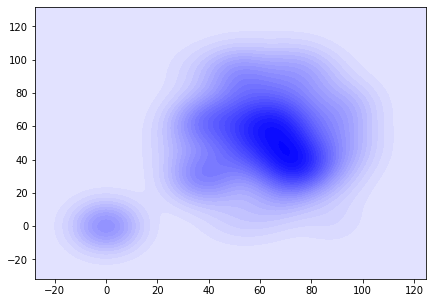

In [210]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches(7, 5)

x4_coord = [i for i in lionelev["x2"]]
y4_coord = [i for i in lionelev["y2"]]
fine2 = sb.kdeplot(x4_coord, y4_coord, shade = "True", color = "blue", n_levels = 30)
plt.show()

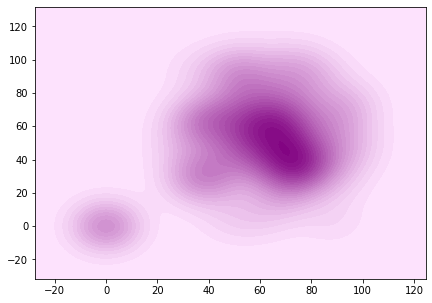

In [212]:
figtt, axtt = plt.subplots()
figtt.set_size_inches(7, 5)
xtt_coord = [i for i in lionelev["x1"]] and [k for  k in lionelev["x2"]]
ytt_coord = [i for i in lionelev["y1"]] and [k for k in lionelev["y2"]]
finett = sb.kdeplot(xtt_coord, ytt_coord, shade = "True", color = "purple", n_levels = 30)
plt.show()

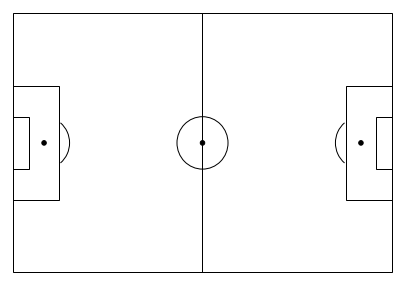

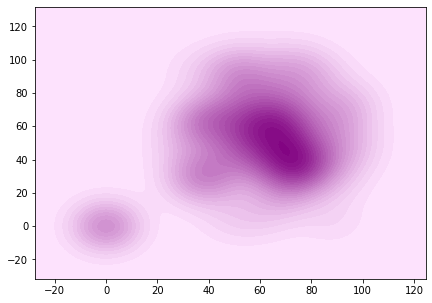

In [213]:
pitch=plt.figure() #set up the figures
pitch.set_size_inches(7, 5)
axes=pitch.add_subplot(1,1,1)
draw_pitch(axes) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
figtt, axtt = plt.subplots()
figtt.set_size_inches(7, 5)
xtt_coord = [i for i in lionelev["x1"]] and [k for  k in lionelev["x2"]]
ytt_coord = [i for i in lionelev["y1"]] and [k for k in lionelev["y2"]]
finett = sb.kdeplot(xtt_coord, ytt_coord, shade = "True", color = "purple", n_levels = 30)
plt.show()

## ... Considering only the match Juventus - Napoli played on the 22 April 2018:

### <font color=green> Visualize with arrows the starting point and ending point of each pass done during the match by Jorginho and Miralem Pjanic. Is there a huge difference between the map with all the passes done and the one with only accurate passes? Comment the results and point out the main differences.